# Project Proposal

### Authors: Harry Li, Haonan Su, Kim Tan Palanca, Wenxuan Zan

## Introduction

According to the United Nations, happiness and well-being play significant roles in societal and economic development (Helliwell et al., 2022). As a result, an annually updated report known as the World Happiness Report quantifies the happiness of individuals in various countries to determine the progression of these elements. The report uses the Cantril ladder as a measurement of happiness where individuals can rate the quality of their lives on a scale of zero to ten, zero being the worst life imagined and ten being the best (OECD, 2013). 
 
The dataset “Happiness and Corruption 2015-2020” presents data from the World Happiness report, including the happiness scores of participating countries and certain factors that may contribute to the score. Utilizing the techniques developed in STAT 301, this project aims to answer the following question through an analysis of the aforementioned dataset:
 
Which among the factors are associated with the response variable `happiness_score`?
> `gdp_per_capita`: Gross domestic product per capita

> `family`: Family 

> `health`: Life expectancy

> `freedom`: Freedom

> `generosity`: Perception of generosity

> `government_trust`: Trust in government

> `cpi_score`: Corruption Perception Index
 
Since the dataset lists the above factors as contributors to the happiness score, they will serve as the explanatory variables for this analysis and the happiness score as the response variable. The hypotheses are as follows:
 
> $H_0$: None of the explanatory variables are statistically associated with the `happiness_score`

> $H_a$: At least one of the explanatory variables is statistically associated with the `happiness_score`
 
Throughout the project, topics such as confounding factors and multicollinearity may arise concerning the association of the variables which will be identified and examined.  


## Exploratory Data Analysis

In [1]:
library(tidyverse)
library(repr)
library(infer)
library(broom)
library(GGally)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   2.1.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



### Data and Import and Wrangling

In [2]:
URL = "https://drive.google.com/uc?export=download&id=1Uwe6T9EdoxAwfwVXvEinE4o6TP9dBSeS"
happiness_data = read.csv(URL,header = TRUE) %>%
select(-c(dystopia_residual,Year,social_support,Country))
happiness_data$continent <- as.factor(happiness_data$continent)
head(happiness_data)

,happiness_score,gdp_per_capita,family,health,freedom,generosity,government_trust,continent,cpi_score
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<int>
1,7.537,1.616463,1.533524,0.7966665,0.6354226,0.3620122,0.3159638,Europe,88
2,7.522,1.482383,1.551122,0.7925655,0.6260067,0.3552805,0.4007701,Europe,91
3,7.504,1.480633,1.610574,0.8335521,0.6271626,0.4755402,0.1535266,Europe,79
4,7.494,1.564980,1.516912,0.8581313,0.6200706,0.2905493,0.3670073,Europe,86
5,7.469,1.443572,1.540247,0.8091577,0.6179509,0.2454828,0.3826115,Europe,90
6,7.377,1.503945,1.428939,0.8106961,0.5853845,0.4704898,0.2826618,Europe,84


### Distribution of Happiness Index

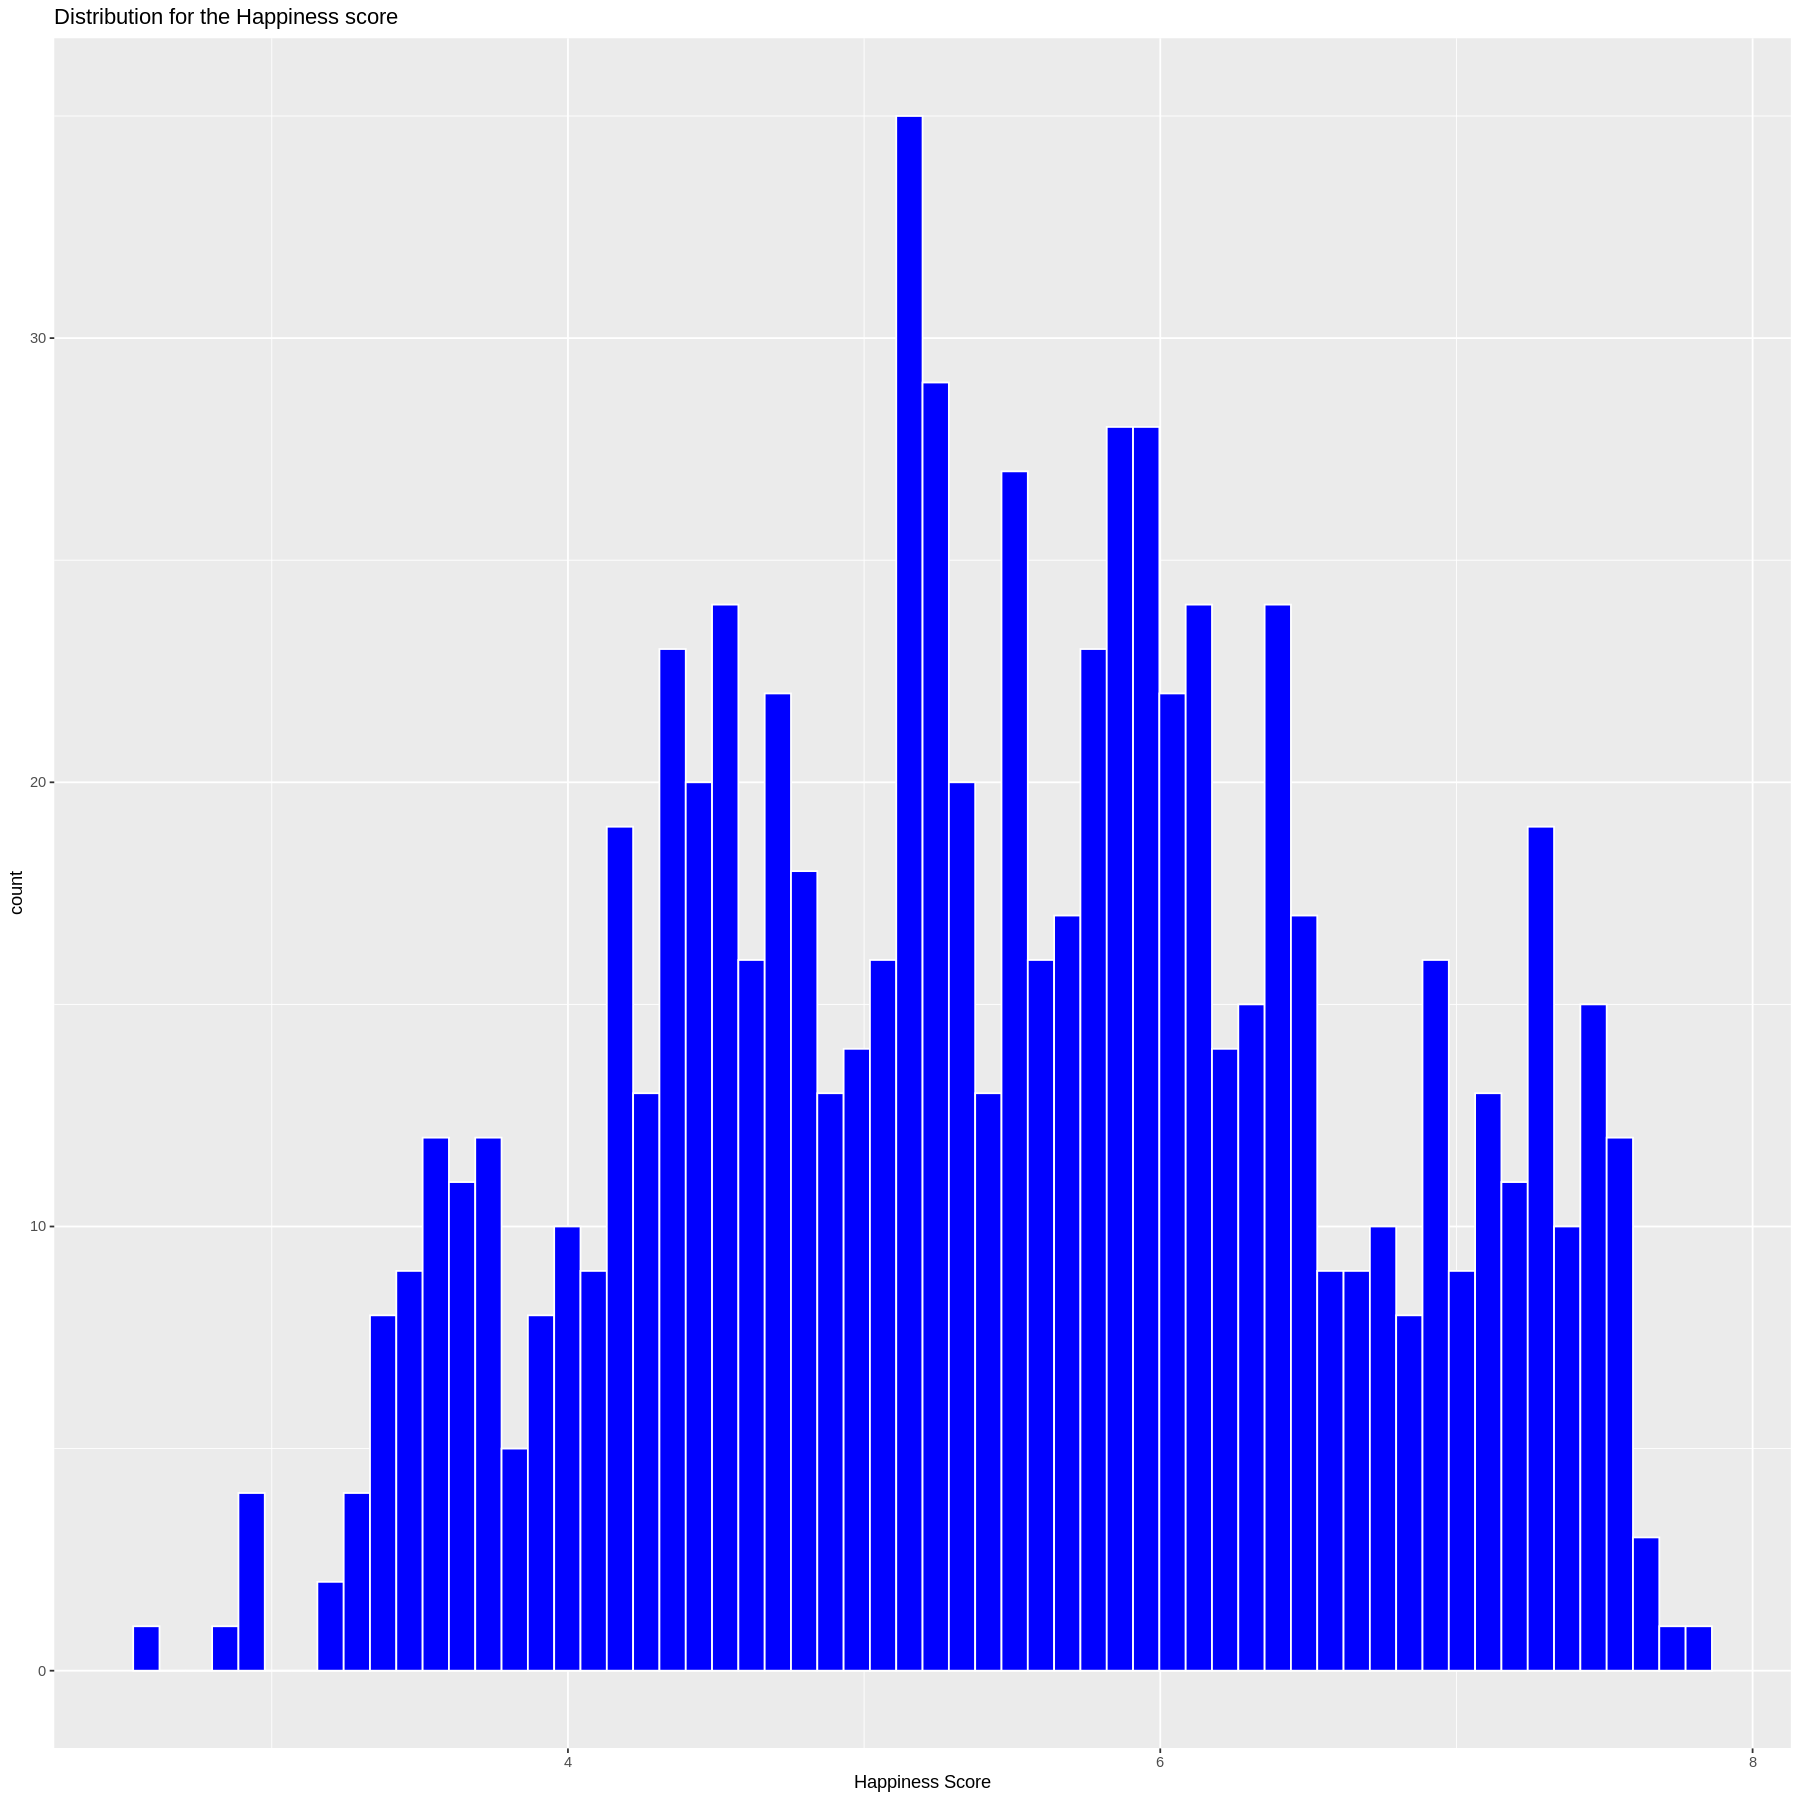

In [3]:
options(repr.plot.width = 15,repr.plot.height = 15)
happiness_dist <- ggplot(happiness_data, aes(x = happiness_score)) +
   geom_histogram(bins = 60, color = "white", fill = "blue") +
   xlab("Happiness Score") +
   ggtitle("Distribution for the Happiness score")
happiness_dist

### Explore Relationship Between Happiness Index and Explanatory Variables

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



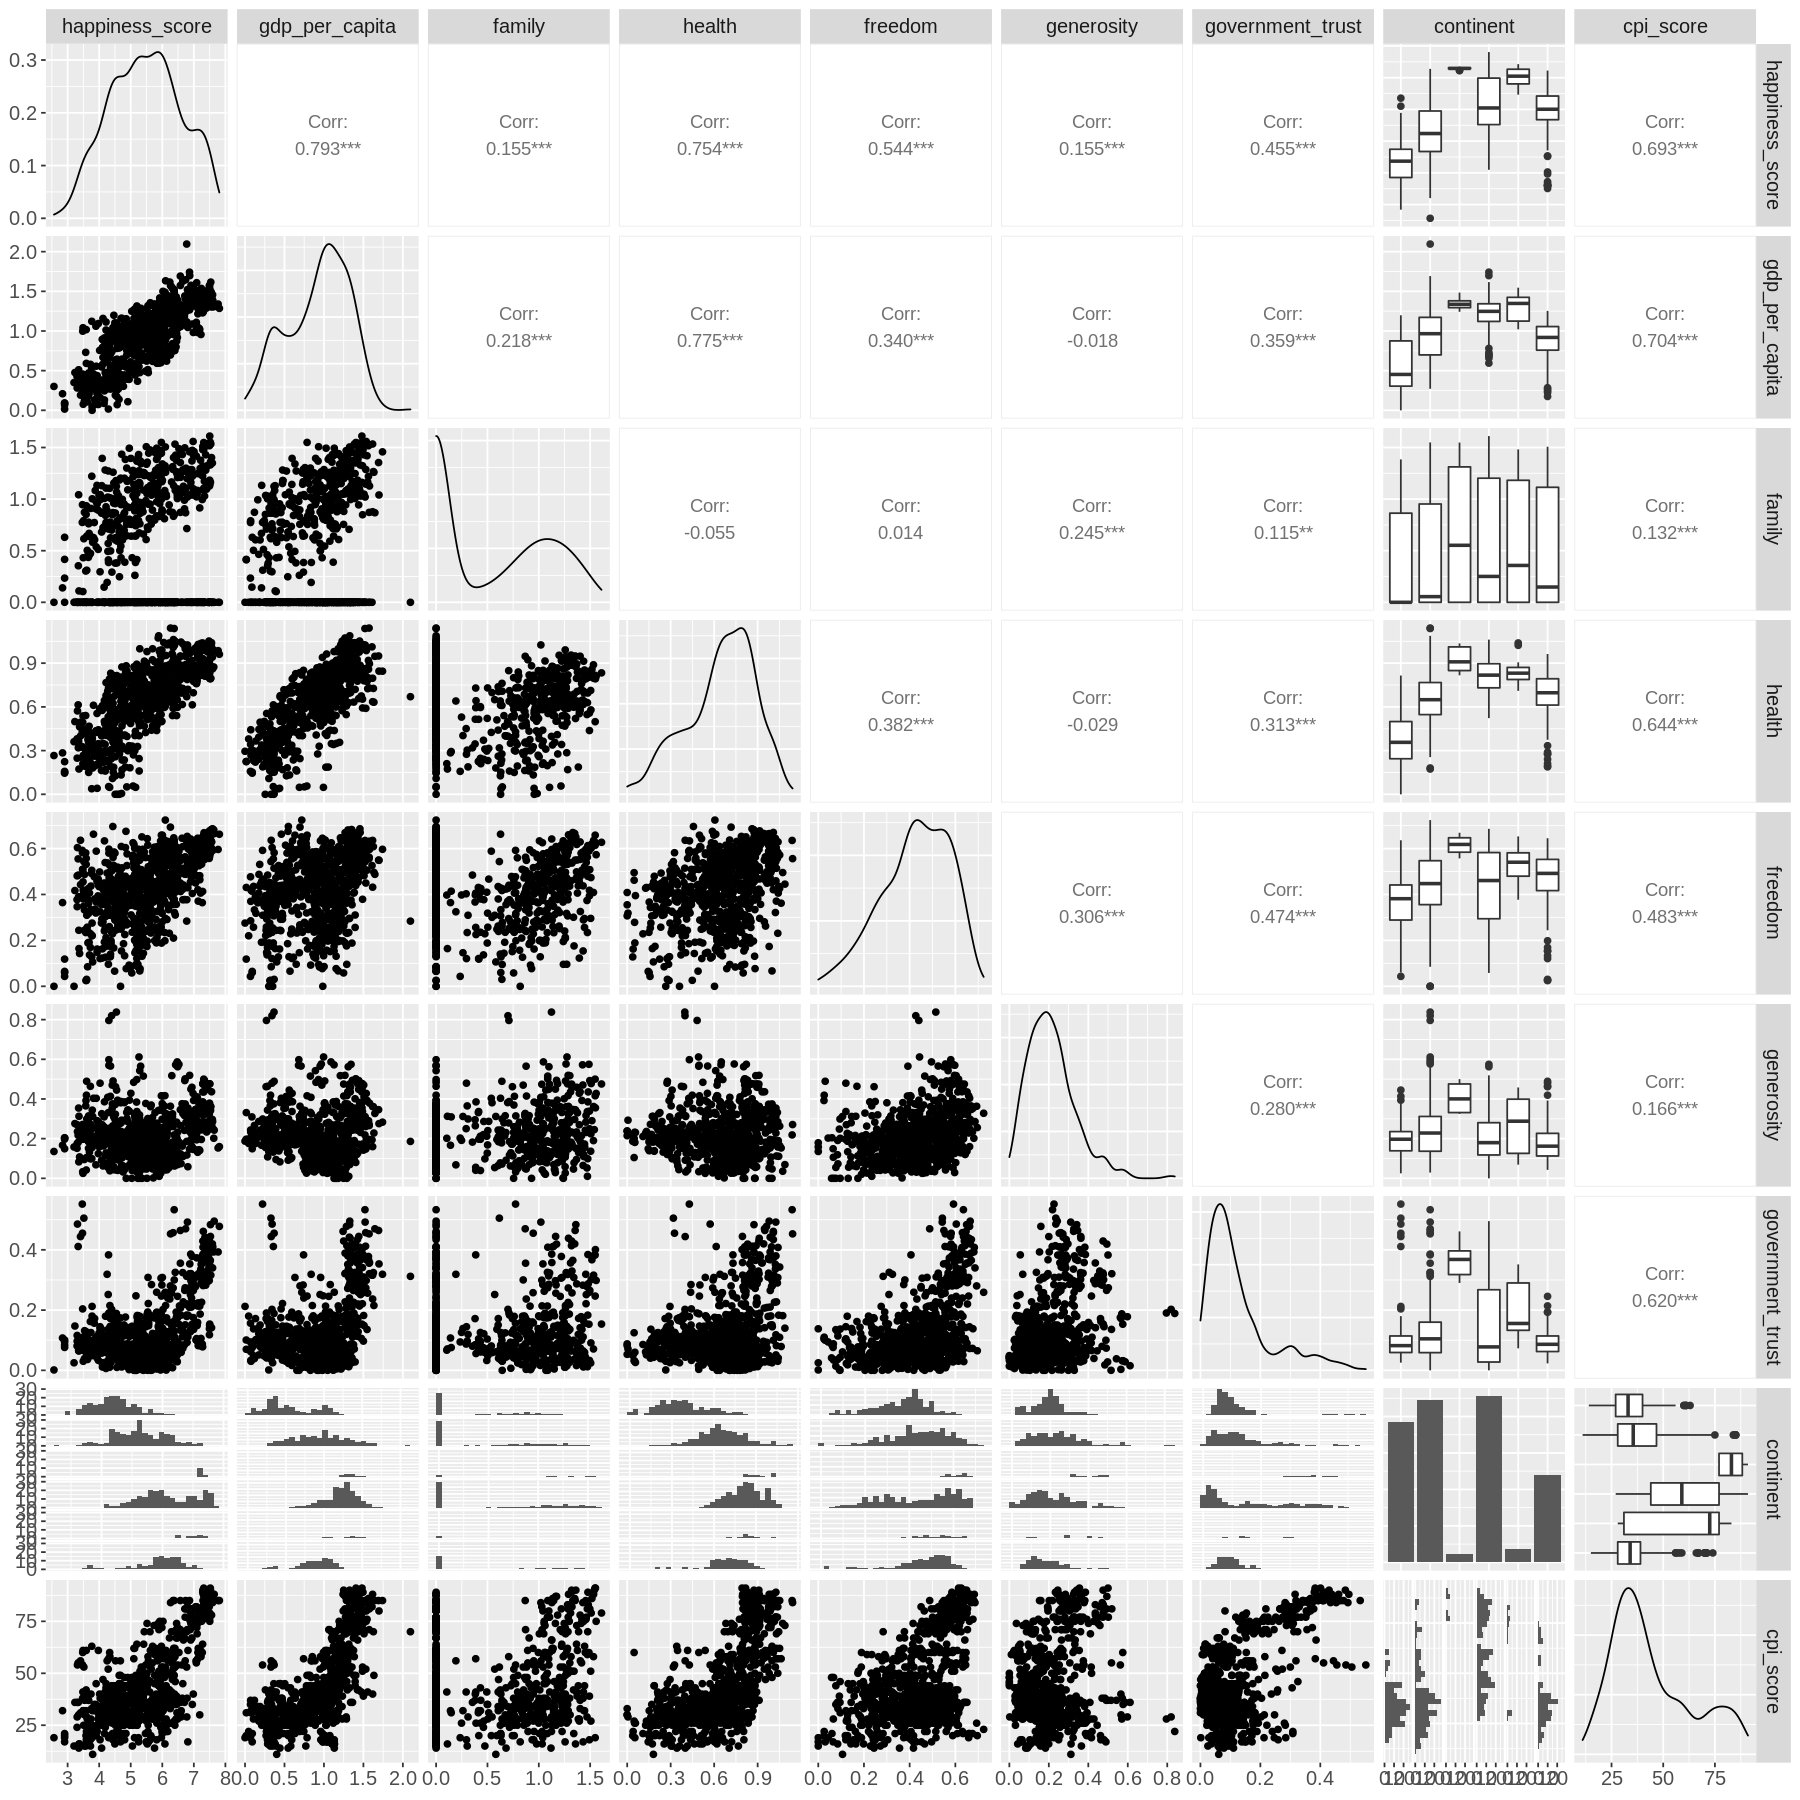

In [4]:
options(repr.plot.width = 15,repr.plot.height = 15)
happiness_data_pairplots <- suppressMessages(
    happiness_data %>%
      ggpairs(progress = FALSE) +
      theme(
        text = element_text(size = 15),
        plot.title = element_text(face = "bold"),
        axis.title = element_text(face = "bold")
      )
    )

happiness_data_pairplots

### Examine Multicolinearity Within Dataset

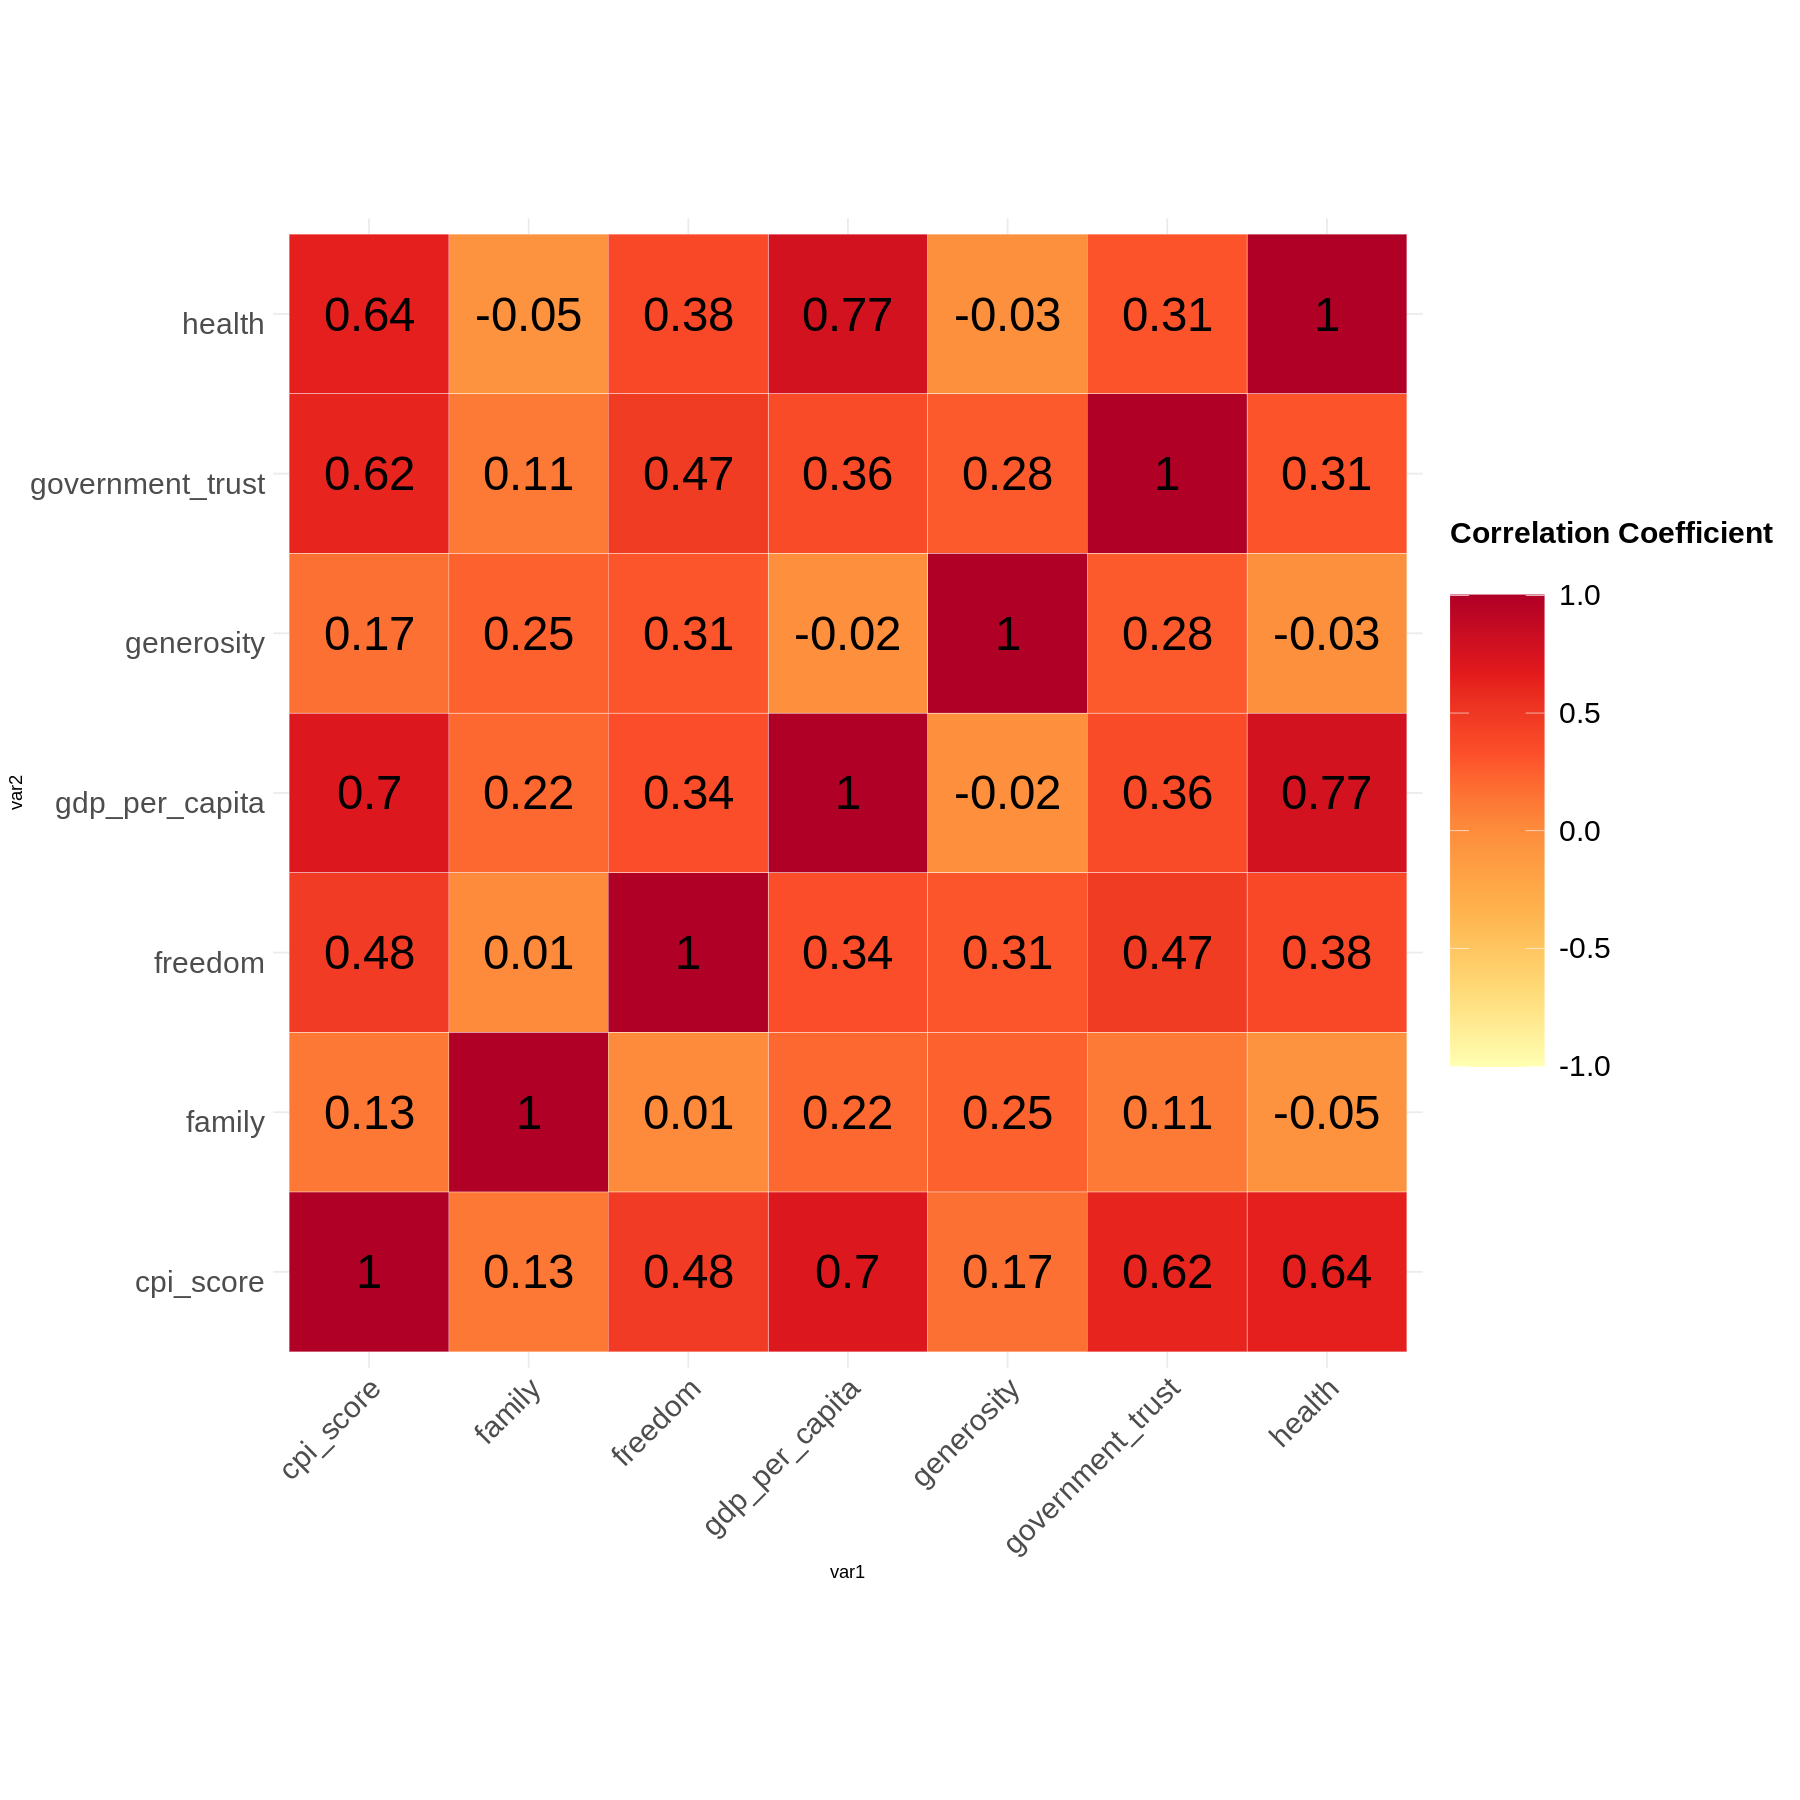

In [5]:
options(repr.plot.width = 15,repr.plot.height = 15)
corr_matrix <- happiness_data %>%
  select(- c(happiness_score,continent)) %>% 
  cor() %>%
  as.data.frame() %>%
  rownames_to_column("var1") %>%
  pivot_longer(-var1, names_to = "var2", values_to = "corr")
plot_corr_matrix <- corr_matrix %>%
  ggplot(aes(var1, var2)) +
  geom_tile(aes(fill = corr), color = "white") +
  scale_fill_distiller("Correlation Coefficient \n",
    palette =  "YlOrRd",
    direction = 1, limits = c(-1,1)
  ) +
  labs(x = "var1", y = "var2") +
  theme_minimal() +
  theme(
    axis.text.x = element_text(
      angle = 45, vjust = 1,
      size = 18, hjust = 1
    ),
    axis.text.y = element_text(
      vjust = 1,
      size = 18, hjust = 1
    ),
    legend.title = element_text(size = 18, face = "bold"),
    legend.text = element_text(size = 18),
    legend.key.size = unit(2, "cm")
  ) +
  coord_fixed() +
  geom_text(aes(var1, var2, label = round(corr,digits =2)), color = "black", size = 10)

plot_corr_matrix

### Compare Difference in Happiness Score by Continent

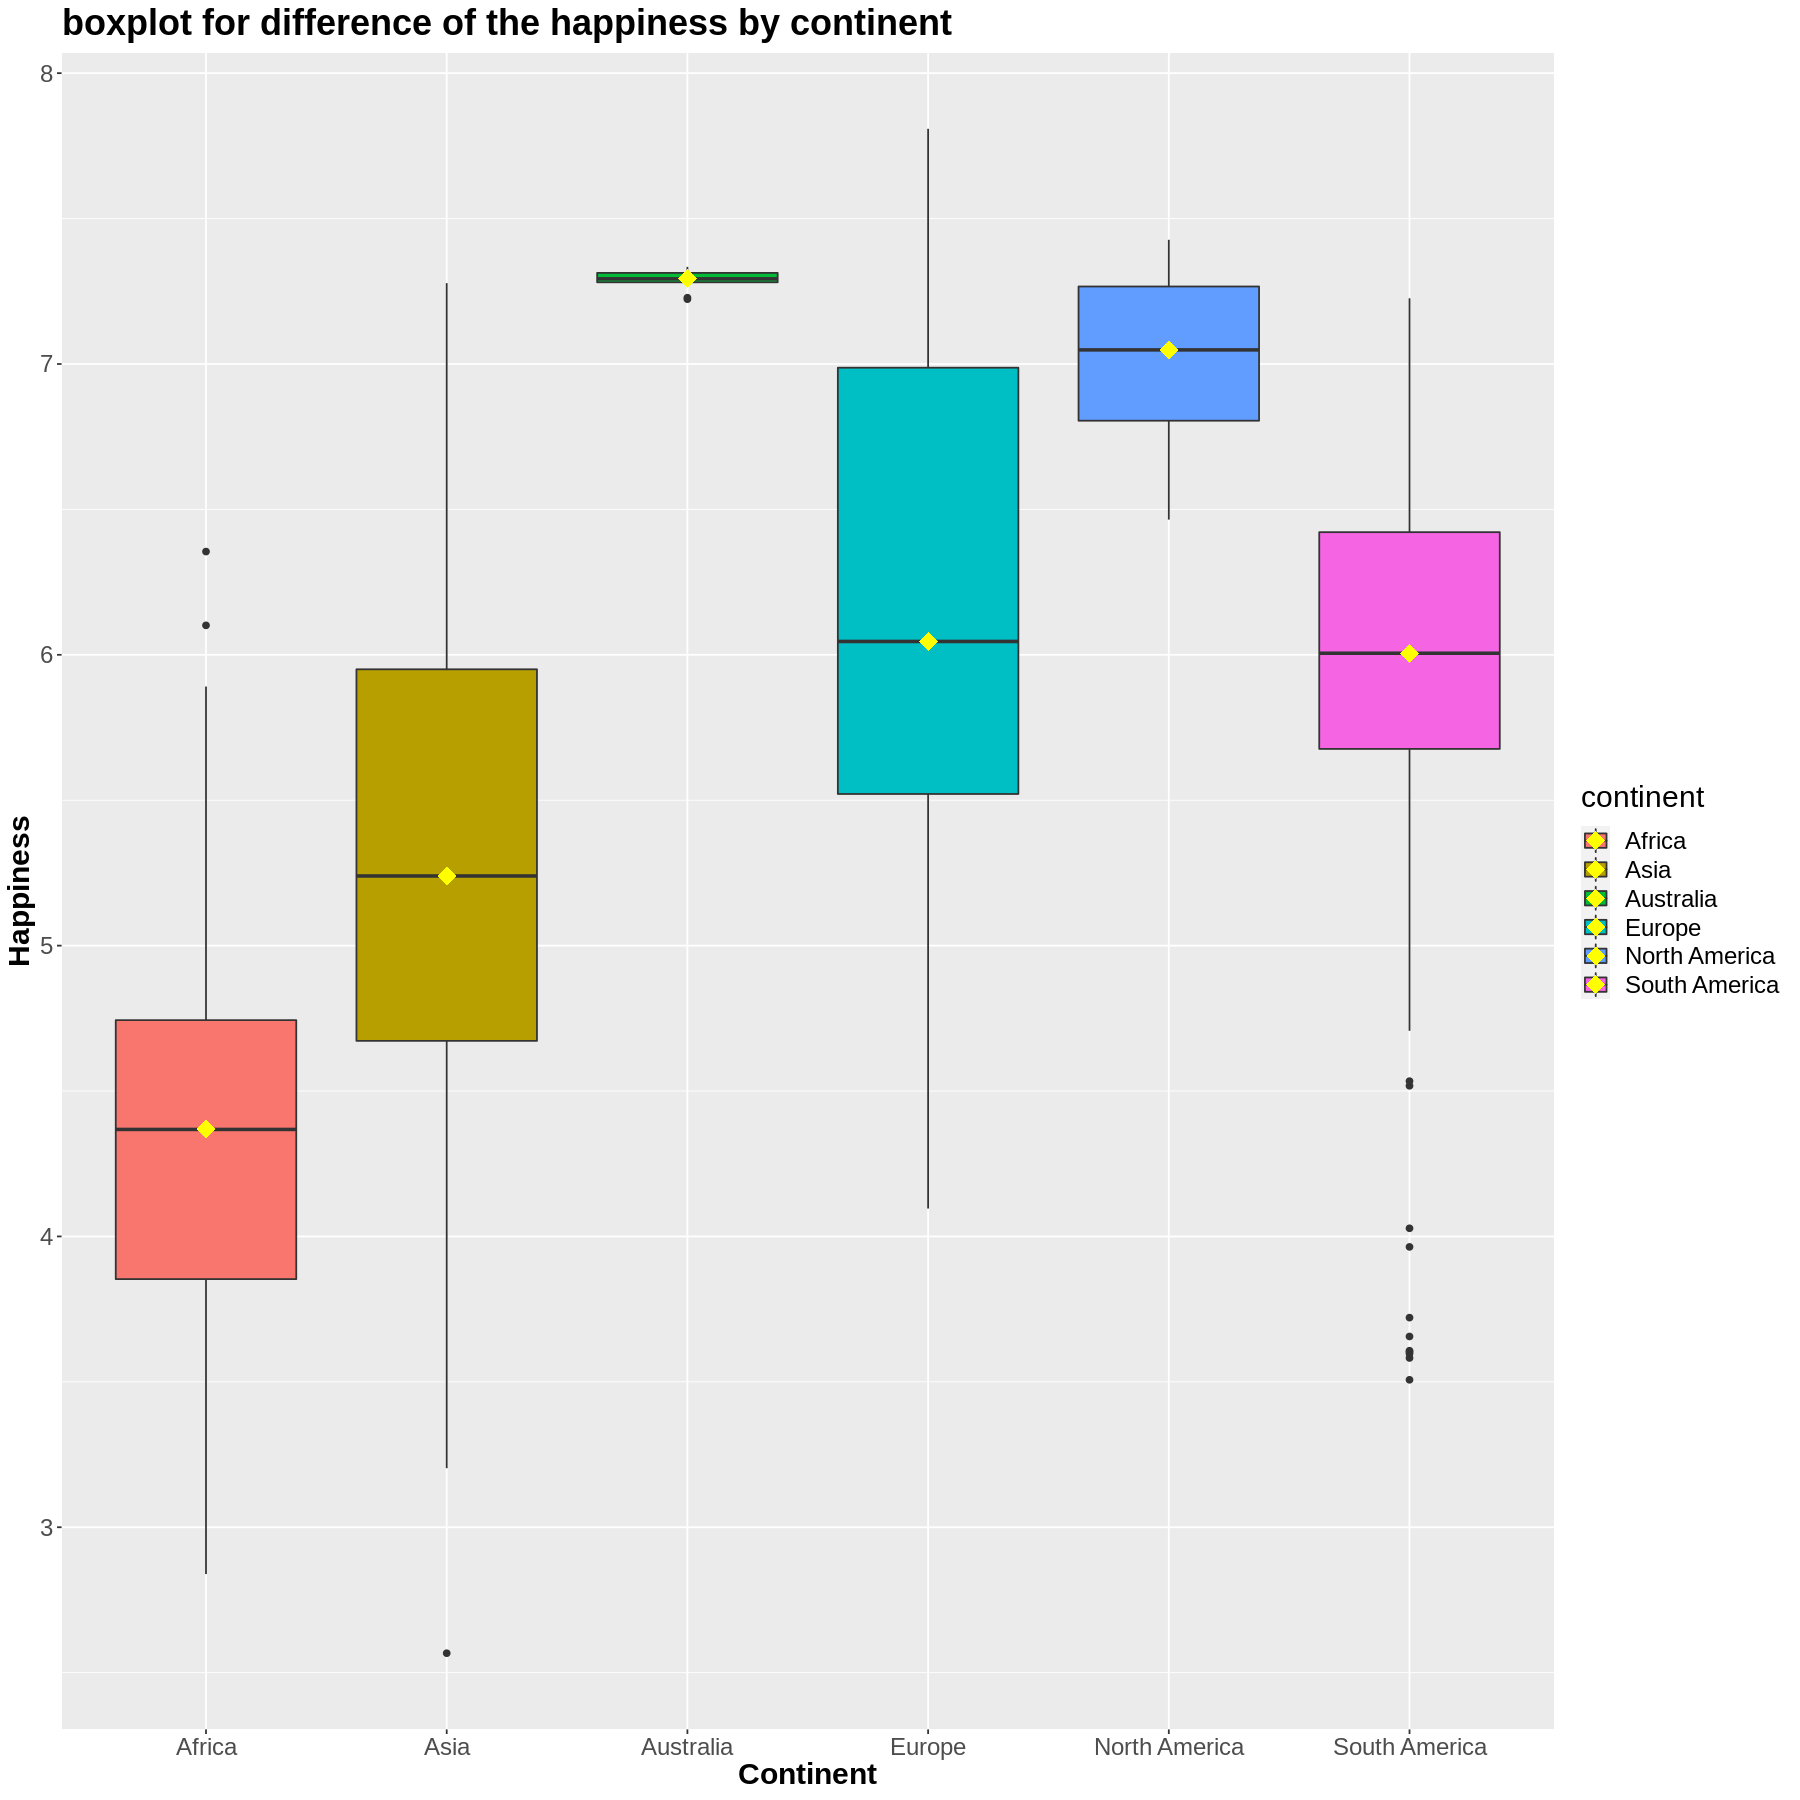

In [6]:
options(repr.plot.width = 15,repr.plot.height = 15)
state_happiness_boxplots <- happiness_data %>%
  ggplot() +
  geom_boxplot(aes(continent, happiness_score, fill =continent)) +
  theme(
    text = element_text(size = 18),
    plot.title = element_text(face = "bold"),
    axis.title = element_text(face = "bold")
  ) +
  ggtitle("boxplot for difference of the happiness by continent") +
  xlab("Continent") +
  ylab("Happiness") +
  stat_summary(aes(continent, happiness_score, fill = continent),
    fun = "median", colour = "yellow", geom = "point",
    shape = 18, size = 5
  )
state_happiness_boxplots

### Additive Model: Full Model

In [7]:
happiness_data_MLR_add <- lm(happiness_score ~ ., data = happiness_data)

happiness_data_MLR_add_results <- tidy(happiness_data_MLR_add, conf.int = 0.95) %>% mutate_if(is.numeric, round, 2)
happiness_data_MLR_add_results

term,estimate,std.error,statistic,p.value,conf.low,conf.high
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),2.44,0.07,33.11,0.00,2.30,2.59
gdp_per_capita,1.38,0.09,14.91,0.00,1.20,1.57
family,0.00,0.04,0.08,0.93,-0.07,0.08
health,0.95,0.16,6.00,0.00,0.64,1.26
freedom,1.46,0.16,9.28,0.00,1.15,1.76
generosity,0.91,0.18,5.15,0.00,0.56,1.25
government_trust,0.90,0.23,3.93,0.00,0.45,1.34
continentAsia,-0.10,0.07,-1.58,0.12,-0.24,0.03
continentAustralia,0.47,0.17,2.76,0.01,0.14,0.80


## Method: Plan

The current project closely examined the `happiness` dataset at hand using a variety of visualizaiton tools to reveal the relationship between the response variable `happiness_score` and explanatory variables. We first examined the association between the response variable and each of the explantory variable using `ggpairs()` function from `GGally`. Then a heatmap has been created to visualize the correlations among explanatory variables in order to examine multicolinearity issue in our dataset; A side-by-side bar plot is created to compare the average level of `happiness_score` across different `continenet`. The current data analysis process throughly examined the dataset for possible issues that might interfere with later process of model selection and evaluation.


For the final report, we are interested in finding the best set of variables in explaining the variations in `happiness_score` while keeping the number of variables as low as possible. In order to answer this question, we plan to first fit a full model to the dataset then employ a backward-selection algorithm to pick the best generative model using the adjusted R^2 metric. We will test our hypothesis with the best generative model obtained using the backward-selection algorithm. We are looking to find a generative model that accounts for the most of the variation in `happiness_score` while using the least number of predictors possible. Our result could be used to understand the relationship betwen `happiness_score` and other measures of economic-social metrics. 

## References
Helliwell, J. F., Layard, R., Sachs, J. D., De Neve, J.-E., Aknin, L. B., Wang, S., & Paculor, S. (2022). Foreword. The World Happiness Report. Retrieved November 3, 2022, from https://worldhappiness.report/ed/2022/foreword/

OECD. (2013). Illustrative examples of subjective well-being measures. OECD Guidelines on Measuring Subjective Well-Being, 249–252. https://doi.org/10.1787/9789264191655-9-en 